<a href="https://colab.research.google.com/github/nailhakim/Deep-Learning/blob/main/UTS_BigData_FaharNailH_1103202133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving smartphone_cleaned_v5.csv to smartphone_cleaned_v5 (1).csv


In [ ]:
# Informasi Dasar Dataset
print("Lima baris pertama dataset:")
print(df.head())
print("\nInformasi dataset:")
df.info()
print("\nStatistik deskriptif kolom numerik:")
print(df.describe())
print("\nJumlah nilai unik per kolom:")
print(df.nunique())

Lima baris pertama dataset:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   screen_size  refresh_rate    resolution  num_rear_cameras  \
0         6.70           120  1440 x


Jumlah nilai yang hilang per kolom:
brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64


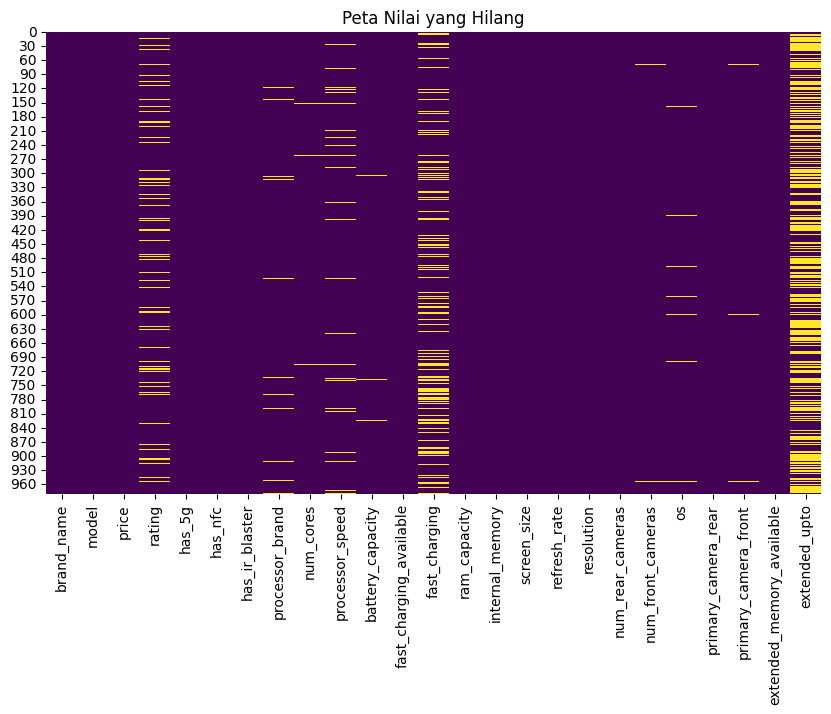

In [ ]:
# Pemeriksaan Nilai yang Hilang (Missing Values)
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Nilai yang Hilang')
plt.show()


Distribusi variabel numerik:


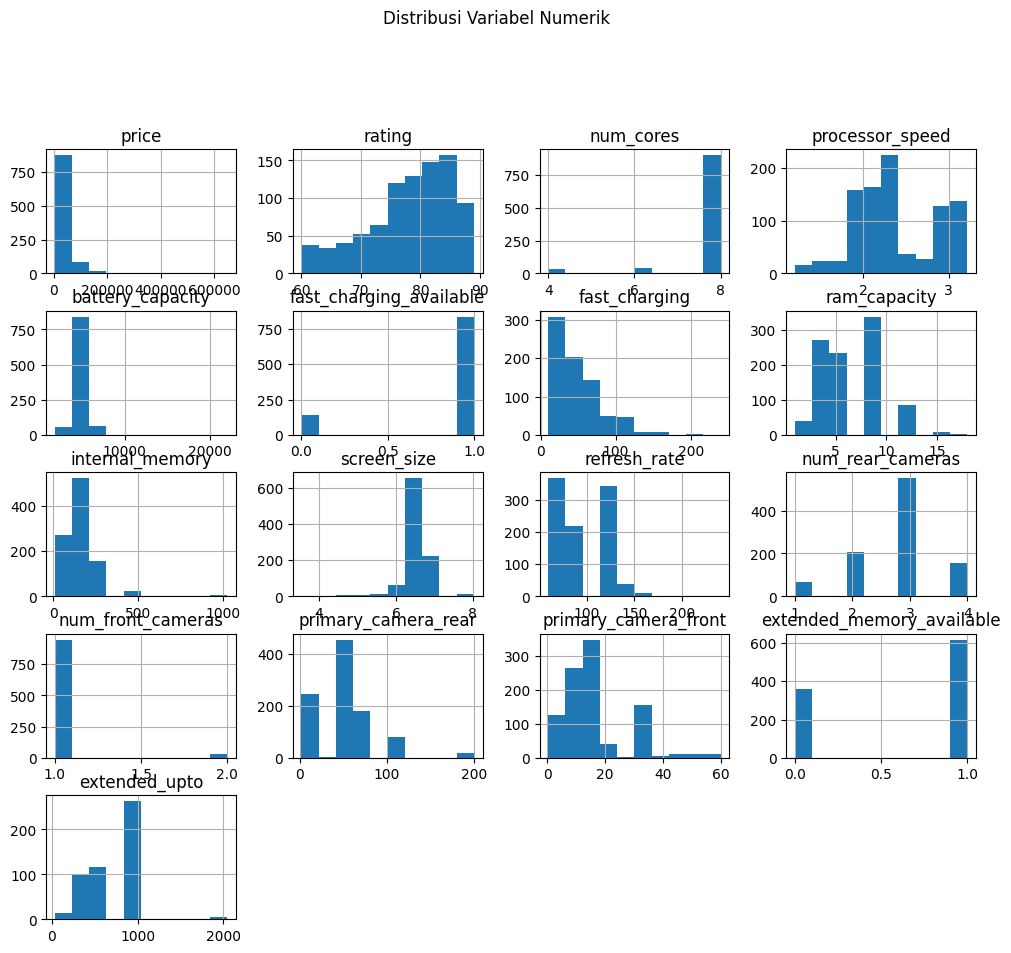


Korelasi antar variabel numerik:


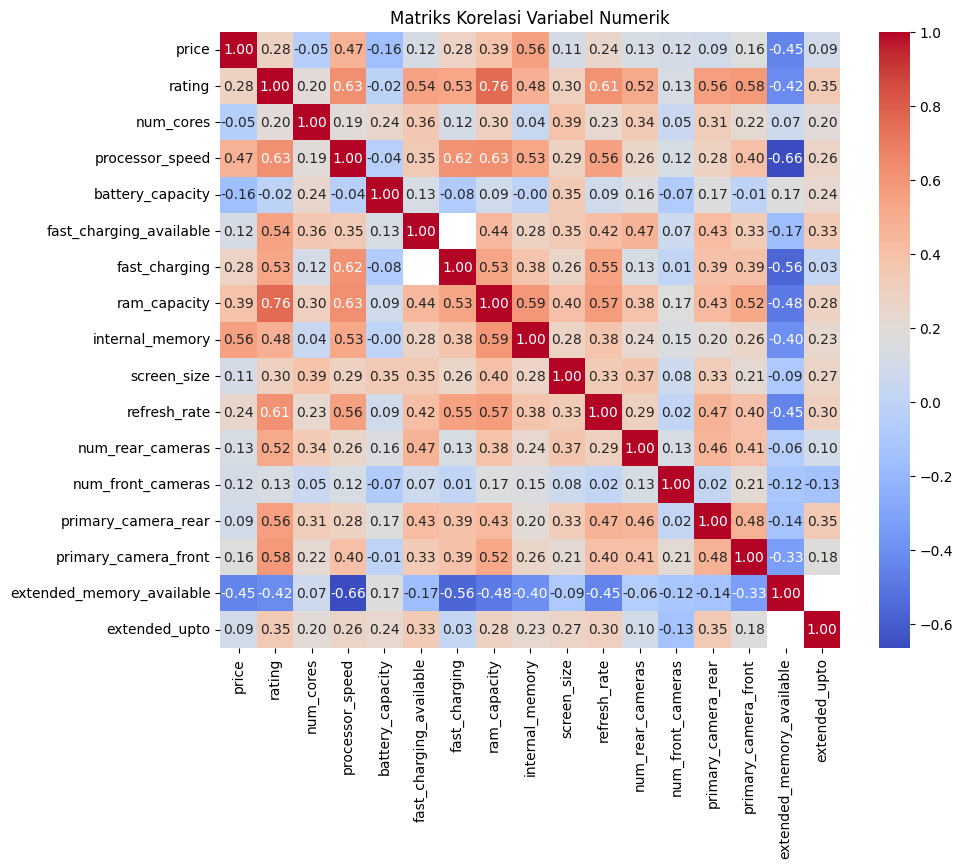

In [ ]:
# Analisis Variabel Numerik
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 0:
    print("\nDistribusi variabel numerik:")
    df[numerical_cols].hist(figsize=(12, 10))
    plt.suptitle('Distribusi Variabel Numerik', y=1.02)
    plt.show()

    print("\nKorelasi antar variabel numerik:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriks Korelasi Variabel Numerik')
    plt.show()
else:
    print("\nTidak ada kolom numerik dalam dataset.")


Distribusi variabel kategorikal:

Distribusi kolom 'brand_name':
brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
jio            4
lava           4
gionee         3
letv           3
ikall          3
lg             3
oukitel        3
redmi          3
micromax       3
doogee         2
lenovo         2
zte            2
lyf            2
royole         2
tesla          1
leeco          1
duoqin         1
cola           1
blu            1
vertu          1
leitz          1
cat            1
tcl            1
sharp          1
blackview      1
Name: count, dtype: int64


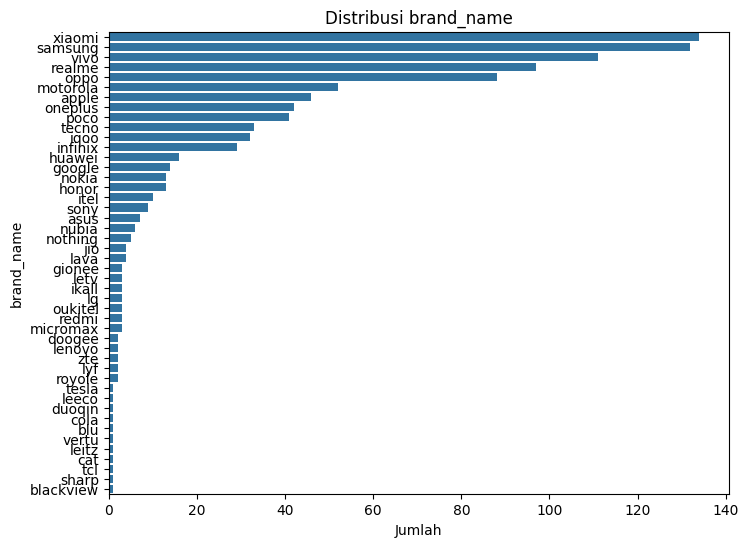


Distribusi kolom 'model':
model
Samsung Galaxy M52s 5G                     1
OnePlus 11 5G                              1
OnePlus Nord CE 2 Lite 5G                  1
Samsung Galaxy A14 5G                      1
Lava X3                                    1
                                          ..
Nothing Phone 1                            1
Xiaomi Redmi Note 12 Pro Plus              1
Apple iPhone 14                            1
Samsung Galaxy F23 5G (6GB RAM + 128GB)    1
Realme 10 Pro Plus                         1
Name: count, Length: 980, dtype: int64


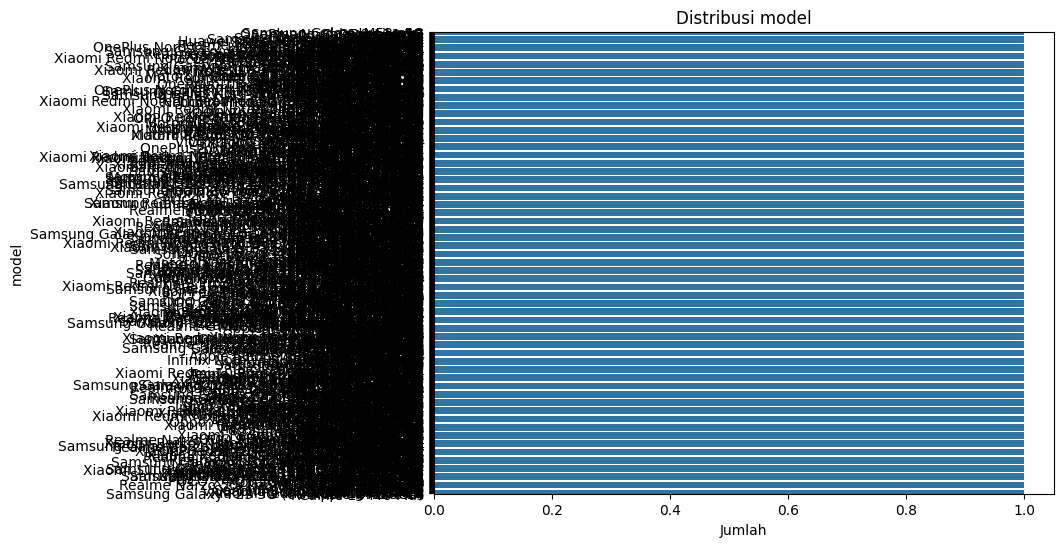


Distribusi kolom 'processor_brand':
processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64


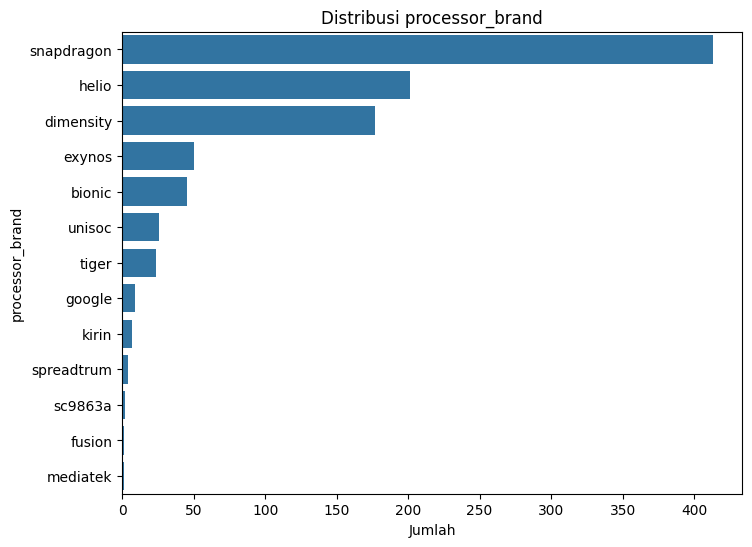


Distribusi kolom 'resolution':
resolution
1080 x 2400     342
720 x 1600      149
1080 x 2408      65
1080 x 2412      58
1080 x 2340      43
               ... 
720 x 1480        1
1440 x 3168       1
1176 x 2400       1
1560 x 720        1
2220 x 1080       1
Name: count, Length: 83, dtype: int64


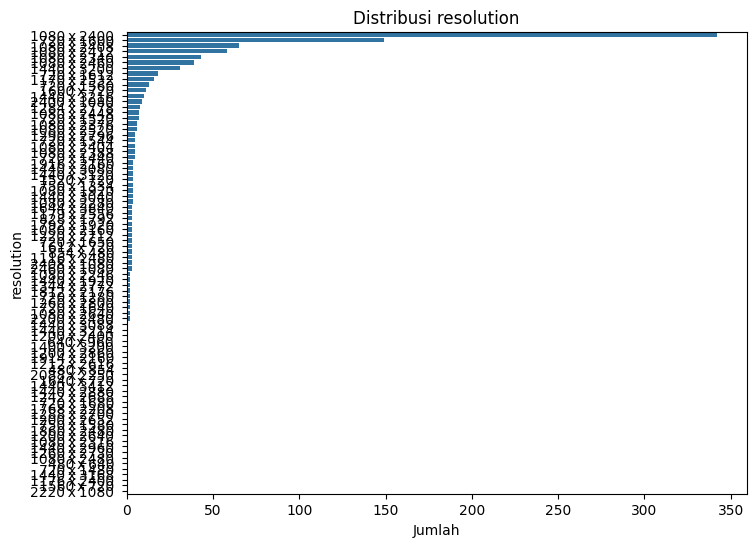


Distribusi kolom 'os':
os
android    909
ios         46
other       11
Name: count, dtype: int64


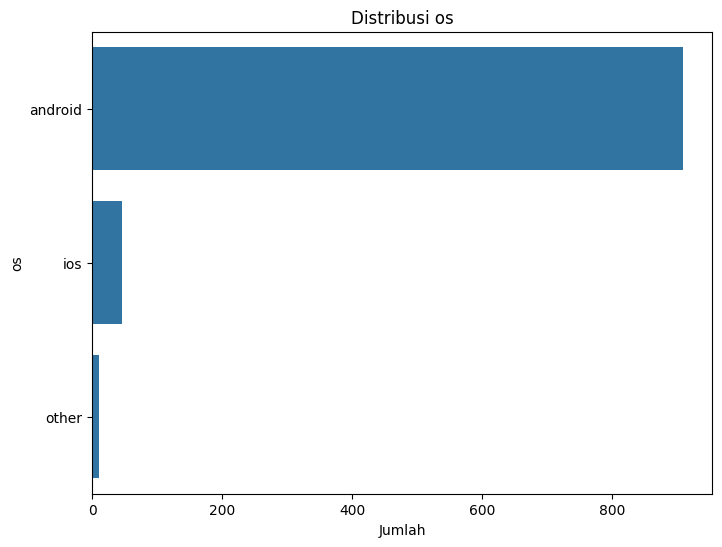

In [ ]:
# Analisis Variabel Kategorikal
categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) > 0:
    print("\nDistribusi variabel kategorikal:")
    for col in categorical_cols:
        print(f"\nDistribusi kolom '{col}':")
        print(df[col].value_counts())
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.xlabel('Jumlah')
        plt.ylabel(col)
        plt.show()
else:
    print("\nTidak ada kolom kategorikal dalam dataset.")

In [ ]:
#Analisis Hubungan Antara Variabel Numerik dan Kategorikal
#Membandingkan harga dengan merek
if 'price' in df.columns and 'brand' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='brand', y='price', data=df)
    plt.title('Harga vs. Merek Smartphone')
    plt.xlabel('Merek')
    plt.ylabel('Harga')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Membandingkan RAM dengan sistem operasi
if 'ram' in df.columns and 'os' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='os', y='ram', data=df)
    plt.title('RAM vs. Sistem Operasi')
    plt.xlabel('Sistem Operasi')
    plt.ylabel('RAM (GB)')
    plt.show()

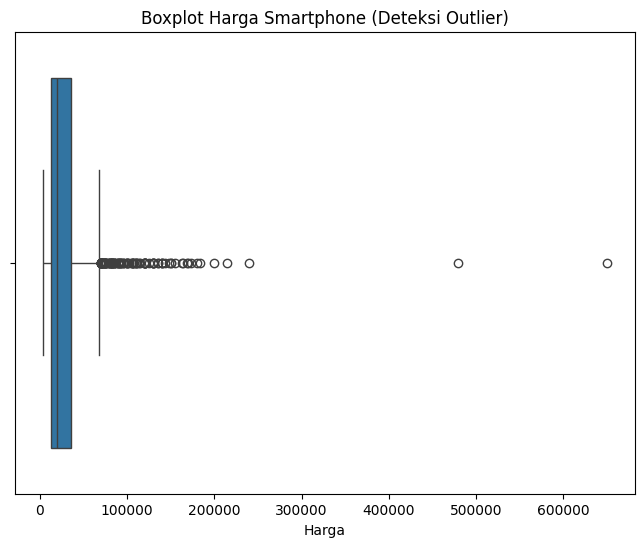

In [ ]:
#Identifikasi Outlier (Opsional)
#Menggunakan boxplot untuk mengidentifikasi outlier pada kolom 'price'
if 'price' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['price'])
    plt.title('Boxplot Harga Smartphone (Deteksi Outlier)')
    plt.xlabel('Harga')
    plt.show()

In [ ]:
#Kesimpulan
print("\nKesimpulan Awal dari EDA:")
print("- Dataset memiliki {} baris dan {} kolom.".format(df.shape[0], df.shape[1]))
print("- Terdapat nilai yang hilang pada kolom: {}".format(df.columns[df.isnull().any()].tolist()))
print("- Distribusi beberapa fitur numerik menunjukkan adanya variasi yang signifikan.")
print("- Terdapat korelasi antara beberapa fitur numerik (perlu dipertimbangkan untuk pemilihan fitur ML).")
print("- Distribusi fitur kategorikal memberikan gambaran tentang proporsi setiap kategori.")
print("- Ada perbedaan yang terlihat dalam distribusi harga dan RAM berdasarkan merek dan sistem operasi.")
print("- Potensi outlier terdeteksi pada kolom 'price' (perlu penanganan lebih lanjut jika diperlukan untuk ML).")


Kesimpulan Awal dari EDA:
- Dataset memiliki 980 baris dan 25 kolom.
- Terdapat nilai yang hilang pada kolom: ['rating', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'num_front_cameras', 'os', 'primary_camera_front', 'extended_upto']
- Distribusi beberapa fitur numerik menunjukkan adanya variasi yang signifikan.
- Terdapat korelasi antara beberapa fitur numerik (perlu dipertimbangkan untuk pemilihan fitur ML).
- Distribusi fitur kategorikal memberikan gambaran tentang proporsi setiap kategori.
- Ada perbedaan yang terlihat dalam distribusi harga dan RAM berdasarkan merek dan sistem operasi.
- Potensi outlier terdeteksi pada kolom 'price' (perlu penanganan lebih lanjut jika diperlukan untuk ML).


In [ ]:
----------------------------------------------------------------------------------------------

In [ ]:
print(df.columns.tolist())

['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'resolution', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']



Data yang telah diproses untuk rekomendasi:
   num__ram_capacity  num__internal_memory  num__battery_capacity  num__price  \
0           0.647059              0.244094                0.15754    0.079660   
1           0.294118              0.118110                0.15754    0.025507   
2           0.176471              0.055118                0.15754    0.020108   
3           0.294118              0.118110                0.15754    0.017788   
4           0.294118              0.118110                0.15754    0.033256   

   cat__processor_brand_bionic  cat__processor_brand_dimensity  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             1.0   

   cat__processor_brand_exynos  cat__processor_brand_fusion  \
0       

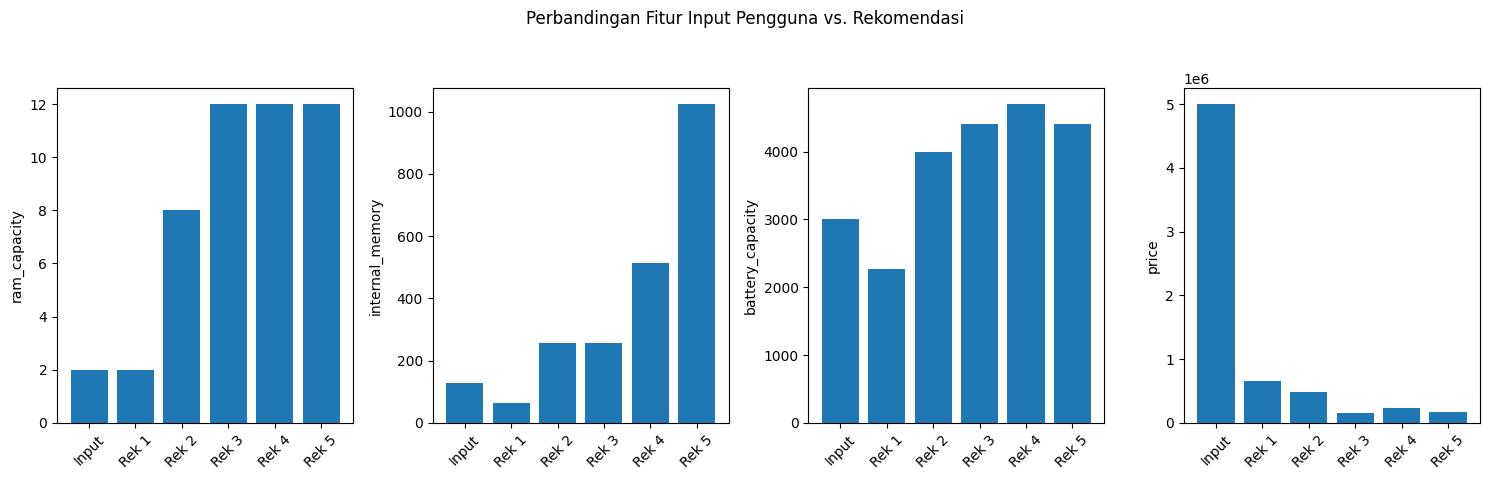

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# --- Langkah 2: Memilih Fitur untuk Rekomendasi ---
fitur_rekomendasi = ['ram_capacity', 'internal_memory', 'processor_brand', 'battery_capacity','brand_name','price']
df_rekomendasi = df[fitur_rekomendasi].copy()
df_rekomendasi.dropna(inplace=True)

# --- Langkah 3: Preprocessing Fitur ---
fitur_numerik = ['ram_capacity', 'internal_memory', 'battery_capacity','price']
fitur_kategorikal = ['processor_brand','brand_name']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), fitur_numerik),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), fitur_kategorikal)
    ])

preprocessor.fit(df_rekomendasi)
df_processed = preprocessor.transform(df_rekomendasi)

feature_names = preprocessor.get_feature_names_out().tolist()
df_processed_df = pd.DataFrame(df_processed, columns=feature_names, index=df_rekomendasi.index)

print("\nData yang telah diproses untuk rekomendasi:")
print(df_processed_df.head())

# --- Langkah 4: Membuat Model KNN ---
model_knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
model_knn.fit(df_processed)

# --- Langkah 5: Fungsi Rekomendasi Berdasarkan Input Pengguna ---
def get_recommendations_from_input_knn(user_input, preprocessor, df_rekomendasi, model_knn, top_n=5, feature_names=None):
    user_df = pd.DataFrame([user_input])

    if not all(col in user_df.columns for col in fitur_rekomendasi):
        print(f"Error: Input harus mengandung kolom: {fitur_rekomendasi}")
        return None

    user_processed = preprocessor.transform(user_df)

    distances, indices = model_knn.kneighbors(user_processed)

    recommendation_indices = df_rekomendasi.iloc[indices[0]].index

    print("\nSpesifikasi Smartphone yang Anda Input:")
    print(user_df[fitur_rekomendasi])
    print(f"\nTop {top_n} Rekomendasi Smartphone (KNN):")

    # Hanya pilih kolom numerik untuk rekomendasi yang akan diplot
    numeric_cols_to_return = ['brand_name', 'ram_capacity', 'internal_memory', 'battery_capacity', 'price']
    rekomendasi = df_rekomendasi.loc[recommendation_indices][numeric_cols_to_return]
    return rekomendasi

# Fungsi untuk Membuat Grafik Perbandingan Fitur
def plot_feature_comparison(user_input, recommendations):
    features_to_compare = ['ram_capacity', 'internal_memory', 'battery_capacity', 'price']
    n_recommendations = len(recommendations)

    fig, axes = plt.subplots(1, len(features_to_compare), figsize=(15, 5))
    fig.suptitle('Perbandingan Fitur Input Pengguna vs. Rekomendasi')

    user_data = pd.Series({feature: user_input[feature] for feature in features_to_compare})

    for i, feature in enumerate(features_to_compare):
        ax = axes[i]
        # Ensure recommendation_values is a list of single values
        recommendation_values = recommendations[feature].values.tolist()
        labels = [f"Rek {j+1}" for j in range(n_recommendations)]

        ax.bar(['Input'] + labels, [user_data[feature]] + recommendation_values) # Pass recommendation_values directly
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Langkah 6: Mendapatkan Input dari Konsumen dan Memberikan Rekomendasi ---
print("\n--- Masukkan Spesifikasi Smartphone yang Anda Inginkan ---")
user_ram_capacity = float(input("Masukkan RAM (GB): "))
user_internal_memory = float(input("Masukkan Penyimpanan Internal (GB): "))
user_processor_brand = input("Masukkan Tipe Prosesor: ").strip()
user_battery_capacity = float(input("Masukkan Kapasitas Baterai (mAh): "))
user_brand_name = input("Masukkan Merek: ").strip()
user_price = float(input("Masukkan Kisaran Harga: "))

user_input = {
    'ram_capacity': user_ram_capacity,
    'internal_memory': user_internal_memory,
    'processor_brand': user_processor_brand,
    'battery_capacity': user_battery_capacity,
    'brand_name': user_brand_name,
    'price': user_price
}

rekomendasi_knn_konsumen = get_recommendations_from_input_knn(user_input, preprocessor, df_rekomendasi, model_knn)

if rekomendasi_knn_konsumen is not None:
    print("\n--- Rekomendasi ---")
    print(rekomendasi_knn_konsumen)
    plot_feature_comparison(user_input, rekomendasi_knn_konsumen)